<a href="https://colab.research.google.com/github/laurenchlebove/CS381/blob/main/L_Chlebove_Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Assignment 1</h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


df = pd.read_csv("https://raw.githubusercontent.com/laurenchlebove/CS381/main/diamonds.csv")
df.columns = ["blank", "carat", "cut", "color", "clarity", "depth", "table", "price", "x", "y", "z"]
df = df.drop("blank", axis = 1) # deletes superfluous numbered coloumn

print("The dimensions of the data are: ", df.shape)
df.head()


The dimensions of the data are:  (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<h3>Part 1: Data Summary</h3>

The diamonds data set provides 53940 use cases. Each case has one of ten attributes: carat, cut, color, clarity, depth, table, price, x, y, and z. Since the length of all columns containing the attributes is 53940, we know that all of the use cases must have all 10 attributes. Furthermore, the isna() method, which dectects missing values, found no missing values for any of the attributes. Attributes carat, depth, table, x, y, and z are all represented with type float64. Attributes cut, color, and clarity are all represented with objects, and price is represented with int64. It follows, then, that the three attributes which are represented by objects rathers than numbers (either floats or integers), have the fewest unique values in all of the data. Cut, color, and clarity are all categorical data, which would logically have fewer potential values than the other attributes which are quantatative data and can be expressed using the infinite reach of numbers.

In [62]:
# DATA SUMMARY WORK

print()
print(str(len(df["carat"])))
print(str(len(df["cut"])))
print(str(len(df["color"])))
print(str(len(df["clarity"])))
print(str(len(df["depth"])))
print(str(len(df["table"])))
print(str(len(df["price"])))
print(str(len(df["x"])))
print(str(len(df["y"])))
print(str(len(df["z"])))

print()
print(df.isna().sum())
print()

df.info()

print()
df.nunique()




53940
53940
53940
53940
53940
53940
53940
53940
53940
53940

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB



carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

<h3>Part 2: Exploratory Data Analysis</h3>

Provide summary statistics for each attribute; provide appropriate
graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to
generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again
using Seaborn. Include a narrative describing your EDA findings.

It should be noted that there is at least one instance of each extreme in the three non numerical attributes (Fair and Ideal for cut, D and J for color, and I1 and IF for clarity), though it is generally more complicated to assign a "min" and "max" value to each of these extremes.

In [94]:
# EXPLORATORY DATA ANALYSIS WORK

# Summary Statistics

# central tendency (only applicable to numerical attributes)
print("Mean:")
print("carat:\t", df["carat"].mean())
print("depth:\t", df["depth"].mean())
print("table:\t", df["table"].mean())
print("price:\t", df["price"].mean())
print("x:\t", df["x"].mean())
print("y:\t", df["y"].mean())
print("z:\t", df["z"].mean())
print()
print("Median:")
print("carat:\t", df["carat"].median())
print("depth:\t", df["depth"].median())
print("table:\t", df["table"].median())
print("price:\t", df["price"].median())
print("x:\t", df["x"].median())
print("y:\t", df["y"].median())
print("z:\t", df["z"].median())


Mean:
carat:	 0.7979397478679852
depth:	 61.74940489432624
table:	 57.45718390804603
price:	 3932.799721913237
x:	 5.731157211716609
y:	 5.734525954764462
z:	 3.5387337782723316

Median:
carat:	 0.7
depth:	 61.8
table:	 57.0
price:	 2401.0
x:	 5.7
y:	 5.71
z:	 3.53


It should be noted that there is at least one instance of each extreme in the three non numerical attributes (Fair and Ideal for cut, D and J for color, and I1 and IF for clarity), though it is generally more complicated to assign a "min" and "max" value to each of these extremes.

In [89]:
# min and max
print("Min:")
print(df.min())
print()
print("Max:")
print(df.max())

Min:
carat       0.2
cut        Fair
color         D
clarity      I1
depth      43.0
table      43.0
price       326
x           0.0
y           0.0
z           0.0
dtype: object

Max:
carat           5.01
cut        Very Good
color              J
clarity         VVS2
depth           79.0
table           95.0
price          18823
x              10.74
y               58.9
z               31.8
dtype: object


In [99]:
# Categorical Data
%matplotlib inline

In [98]:
# cut values
df["cut"].value_counts()


Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

Text(0.5, 1.0, 'Cut of Diamonds')

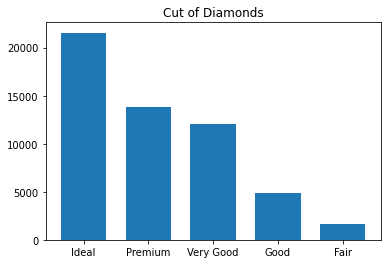

In [23]:
# matplotlib bar graph for cut

fig1 = plt.figure(figsize = (6, 4))
plt.bar(["Ideal", "Premium", "Very Good", "Good", "Fair"], df["cut"].value_counts(), width = 0.7)
plt.title("Cut of Diamonds")


[Text(0.5, 1.0, 'Cut of Diamonds')]

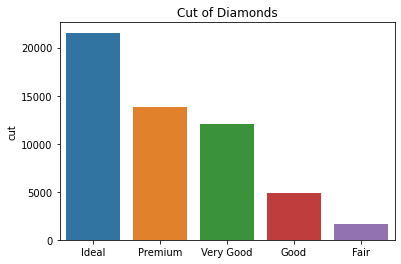

In [24]:
# seaborn bar graph for cut

sns.barplot(x = ["Ideal", "Premium", "Very Good", "Good", "Fair"], y = df["cut"].value_counts()).set(title = "Cut of Diamonds")

In [100]:
# color values
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

Text(0.5, 1.0, 'Color of Diamonds')

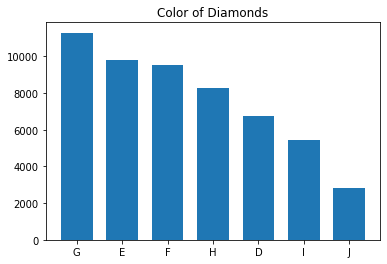

In [27]:
# matplotlib bar graph for color

fig2 = plt.figure(figsize = (6, 4))
plt.bar(["G", "E", "F", "H", "D", "I", "J"], df["color"].value_counts(), width = 0.7)
plt.title("Color of Diamonds")


[Text(0.5, 1.0, 'Color of Diamonds')]

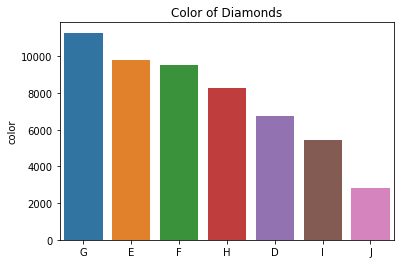

In [25]:
#seaborn bar graph for color

sns.barplot(x = ["G", "E", "F", "H", "D", "I", "J"], y = df["color"].value_counts()).set(title = "Color of Diamonds")

In [101]:
# clarity values
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Text(0.5, 1.0, 'Clarity of Diamonds')

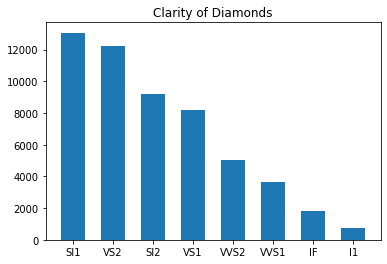

In [28]:
# matplotlib bar graph for clarity

fig3 = plt.figure(figsize = (6, 4))
plt.bar(["SI1", "VS2", "SI2", "VS1", "VVS2", "VVS1", "IF", "I1"], df["clarity"].value_counts(), width = 0.6)
plt.title("Clarity of Diamonds")

[Text(0.5, 1.0, 'Clarity of Diamonds')]

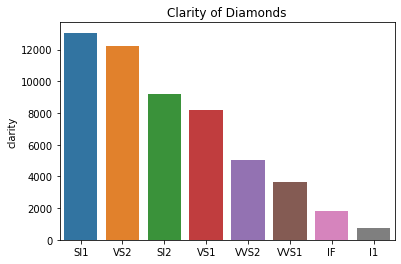

In [29]:
# seaborn bar graph for clarity

sns.barplot(x = ["SI1", "VS2", "SI2", "VS1", "VVS2", "VVS1", "IF", "I1"], y = df["clarity"].value_counts()).set(title = "Clarity of Diamonds")

Text(0.5, 1.0, 'Carats of Diamonds')

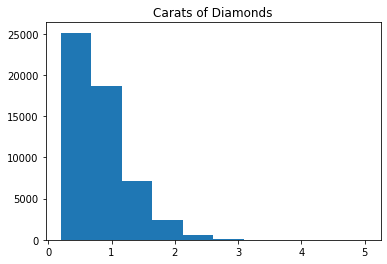

In [65]:
# Numerical Data

# matplotlib graph for carat

plt.hist(df["carat"])
plt.title("Carats of Diamonds")

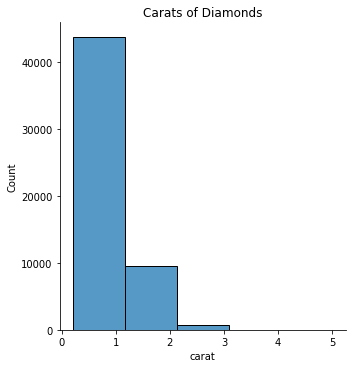

In [68]:
sns.displot(df["carat"], bins = 5).set(title = "Carats of Diamonds")

Text(0.5, 1.0, 'Depth of Diamonds')

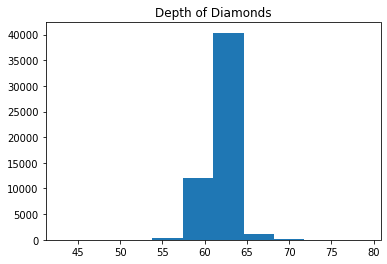

In [64]:
# matplotlib graph for depth

plt.hist(df["depth"])
plt.title("Depth of Diamonds")

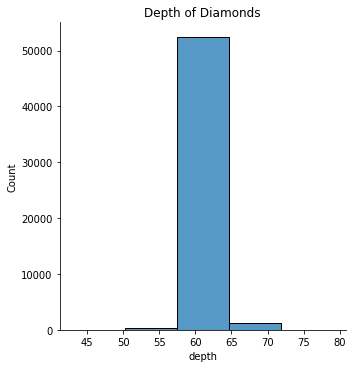

In [70]:
sns.displot(df["depth"], bins = 5).set(title = "Depth of Diamonds")

Text(0.5, 1.0, 'Table of Diamonds')

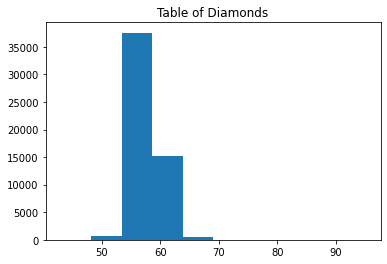

In [63]:
# matplotlib graph for table

plt.hist(df["table"])
plt.title("Table of Diamonds")

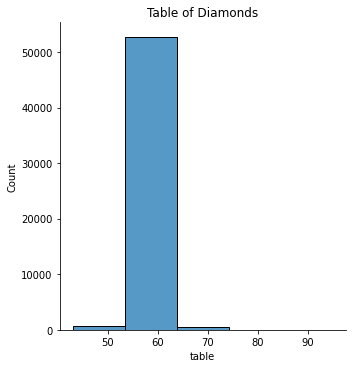

In [69]:
sns.displot(df["table"], bins = 5).set(title = "Table of Diamonds")

Text(0.5, 1.0, 'Price of Diamonds')

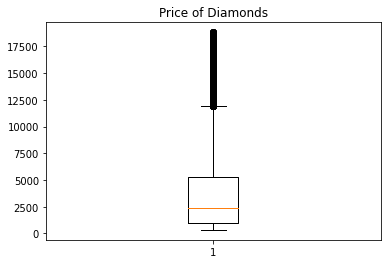

In [62]:
# matplotlib graph for price

plt.boxplot(df["price"])
plt.title("Price of Diamonds")

[Text(0.5, 1.0, 'Price of Diamonds')]

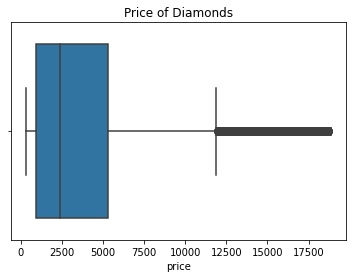

In [49]:
sns.boxplot(x = df["price"]).set(title = "Price of Diamonds")

Text(0.5, 1.0, 'X Dimension of Diamonds')

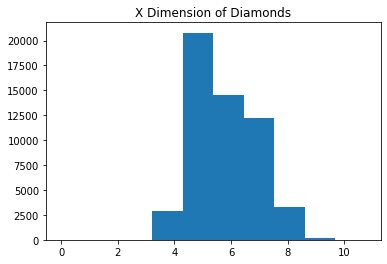

In [59]:
# matplotlib graph for x

plt.hist(df["x"])
plt.title("X Dimension of Diamonds")


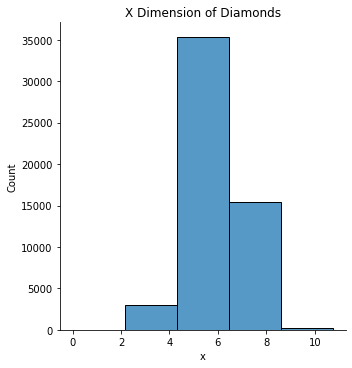

In [71]:
sns.displot(df["x"], bins = 5).set(title = "X Dimension of Diamonds")

Text(0.5, 1.0, 'Y Dimension of Diamonds')

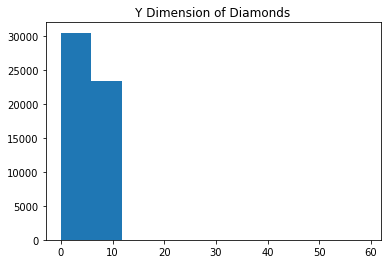

In [57]:
# matplotlib graph for y

plt.hist(df["y"])
plt.title("Y Dimension of Diamonds")


In [ ]:
sns.displot(df["y"], bins = 5).set(title = "Y Dimension of Diamonds")

Text(0.5, 1.0, 'Z Dimension of Diamonds')

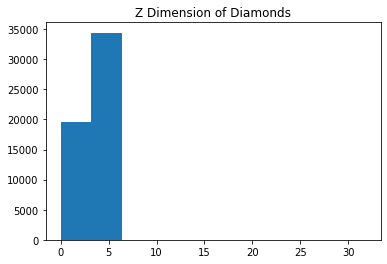

In [58]:
# matplotlib graph for z

plt.hist(df["z"])
plt.title("Z Dimension of Diamonds")


In [ ]:
sns.displot(df["z"], bins = 5).set(title = "Z Dimension of Diamonds")

Narrative of Findings:

For categorical data, the most frequent diamonds were those with an average color, not close to eithe extreme. The same seems to be true for clarity - the two extremes, I1 and IF, are the two lowest frequencies. The opposite was true of the cut attribute - the most frequent were those with an ideal cut.

For numerical data, there are large jumps, or large ranges, in the attributes for table, depth and carat. X, y, and z also contained some variance, but not to the extent of the other categories.

<h3>Part 3: Inferences</h3>

 What proportion of diamonds are between .30 and 1.08 carats?

In [13]:
carat_array = np.array(df["carat"])

correct_carat_array = [x for x in carat_array if x > .3 and x < 1.08]
prop = len(correct_carat_array)/ 53940
print("The proportion of diamonds between .3 and 1.08 carats is ",  prop)


The proportion of diamonds between .3 and 1.08 carats is  0.6939933259176864


How many of the diamonds have equal x and y dimensions?

In [75]:
x_array = np.array(df["x"])
y_array = np.array(df["y"])

eq_xy = len([i for i in range(len(x_array)) if x_array[i] == y_array[i]])
print("There are", eq_xy, "diamonds with equal x and y dimensions.")

There are 17 diamonds with equal x and y dimensions.


How many of the diamonds have a carat value that is less than the mean carat value?

In [14]:
carat_mean = df["carat"].mean()

num_carat_less = len([x for x in carat_array if x < carat_mean])
print("There are", num_carat_less, "diamons with less carats than the mean.")

There are 31127 diamons with less carats than the mean.


How many diamonds have a Premium cut or better? Note that the possible values for the quality of a
cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal

In [17]:
cut_array = np.array(df["cut"])

good_cut = len([x for x in cut_array if x == "Premium" or x == "Ideal"])
print("There are", good_cut, "premium cut or better diamonds.")

There are 35342 premium cut or better diamonds.


Which diamond has the highest price per carat? What is its value?

In [15]:
price_array = np.array(df["price"])
biggest = 0
index = 0

for i in range(len(price_array)):
  if price_array[i]/carat_array[i] > biggest:
    biggest = price_array[i]/carat_array[i]
    index = i

print("The diamond with the highest price per carat is number", index, "- It costs",
      price_array[index])



The diamond with the highest price per carat is number 27635 - It costs 18542


Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and
discuss any conclusions you can draw from the appearance of the boxplots

[ 326  326  327 ... 2757 2757 2757]


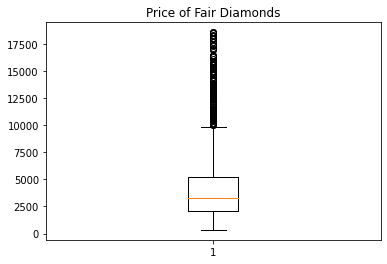

In [22]:
fair_array = np.array([price_array[i] for i in range(len(price_array)) if cut_array[i] == "Fair"])

plt.boxplot(fair_array)
plt.title("Price of Fair Diamonds")

[Text(0.5, 1.0, 'Price Fair of Diamonds')]

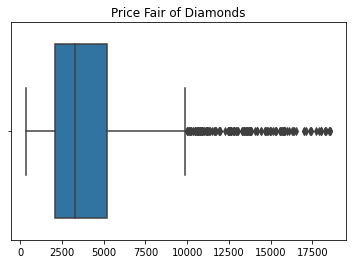

In [31]:
sns.boxplot(x = fair_array).set(title = "Price of Fair Diamonds")

Text(0.5, 1.0, 'Price of Good Diamonds')

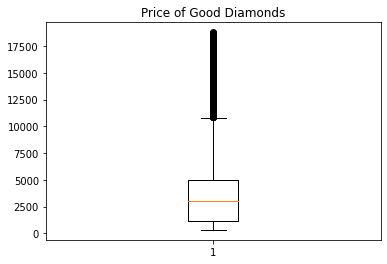

In [24]:
good_array = np.array([price_array[i] for i in range(len(price_array)) if cut_array[i] == "Good"])

plt.boxplot(good_array)
plt.title("Price of Good Diamonds")

In [ ]:
sns.boxplot(x = good_array).set(title = "Price of Good Diamonds")

Text(0.5, 1.0, 'Price of Very Good Diamonds')

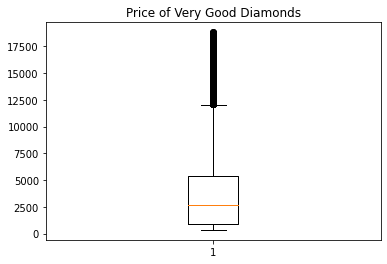

In [25]:
vgood_array = np.array([price_array[i] for i in range(len(price_array)) if cut_array[i] == "Very Good"])

plt.boxplot(vgood_array)
plt.title("Price of Very Good Diamonds")

[Text(0.5, 1.0, 'Price of Very Good Diamonds')]

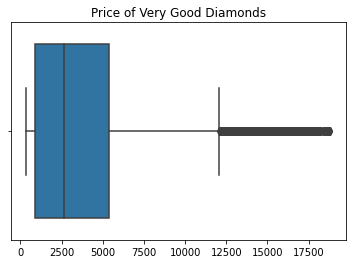

In [32]:
sns.boxplot(x = vgood_array).set(title = "Price of Very Good Diamonds")

Text(0.5, 1.0, 'Price of Premium Diamonds')

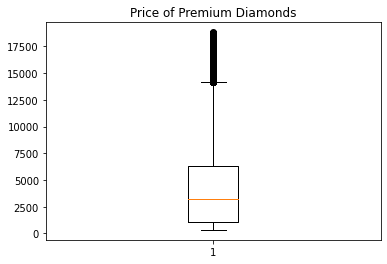

In [26]:
premium_array = np.array([price_array[i] for i in range(len(price_array)) if cut_array[i] == "Premium"])

plt.boxplot(premium_array)
plt.title("Price of Premium Diamonds")

[Text(0.5, 1.0, 'Price of Premium Diamonds')]

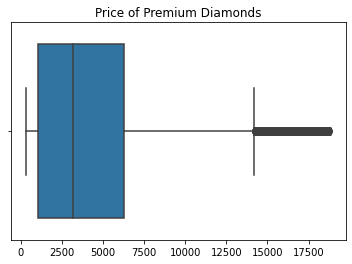

In [33]:
sns.boxplot(x = premium_array).set(title = "Price of Premium Diamonds")

Text(0.5, 1.0, 'Price of Ideal Diamonds')

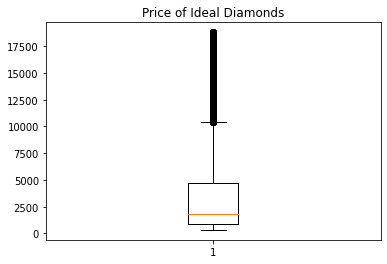

In [27]:
ideal_array = np.array([price_array[i] for i in range(len(price_array)) if cut_array[i] == "Ideal"])

plt.boxplot(ideal_array)
plt.title("Price of Ideal Diamonds")

[Text(0.5, 1.0, 'Price of Ideal Diamonds')]

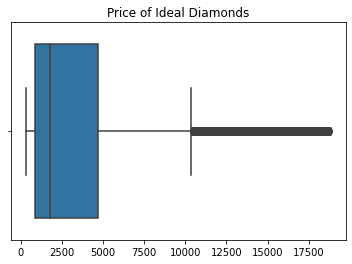

In [34]:
sns.boxplot(x = ideal_array).set(title = "Price of Ideal Diamonds")

From the graphs seen above, we can observe that though the cut of the quality increases from Fair all the way up until Ideal, the price for the majority of diamonds doesn't much change: it remains at about $5000 or less. Therefore, it can be hypothesized that cut is not a big factor for places which sell diamonds when determining the price. 

 Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the
relationship between those two attributes?

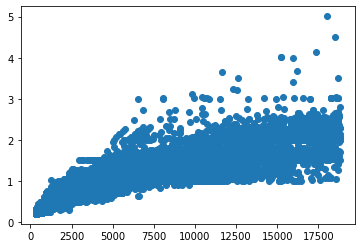

In [35]:
plt.scatter(price_array, carat_array)

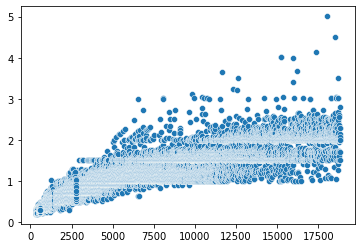

In [38]:
sns.scatterplot(x = price_array, y = carat_array)

Since the scatter plots seems to show a general line trend, it seems that the attributes of price and carat are loosely correlated.

<h3>Conclusion</h3>

Overall, the various characteristics that can be attributed to a diamond seem to relate to one another. The price and the carat seem to be correlated to some degree, whereas the price and cut of the diamond is less so. Given that the mean price is well over 3000 dollars, it might be prudent for one looking to purchase a diamond to do a lot of reasearch on each attribute of the particular diamond they are looking to purchase, because clearly expensive does not necessarily guarantee quality, particularly not when the cost is being set by a person or entity who stands to gain from the ignorance of the general public about diamonds.

<h3>References</h3>

Fried, Matthew J. Section 19: Step-by-Step Explanation of an Introductory Project. Udemy.

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html